# Decision tree classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

To start, we will create a simple dataset to illustrate how classification works and we render it. The example is slightly different from the one in the slides, as sk-learn Decision tree classifier does not support categorical variables.

Our dataset is composed by two features (colour and diameter) and the label (fruit).

In [2]:
X = pd.DataFrame([['2','3','mango'],
                    ['3','3','mango'],
                    ['1','1','grape'],
                    ['1','1','grape'],
                    ['3','3','lemon']], columns=['colour','diameter','label'])
X

,colour,diameter,label
0,2,3,mango
1,3,3,mango
2,1,1,grape
3,1,1,grape
4,3,3,lemon


We want to create a decision tree to know what type of fruits we have based only on its colour and diameter.

In [4]:
# importing the decision tree classifier algorithm function from sklearn
from sklearn.tree import DecisionTreeClassifier
# we create the decision tree classifier model
# random_state is used to fix the randomness and obtain the same result every time
decision_tree = DecisionTreeClassifier(random_state=4242)
# we create the tree based on our dataset
# we give it all the columns except the last one as data, and the last as label
decision_tree.fit(X[X.columns[:-1]], X['label'])

DecisionTreeClassifier(random_state=4242)

The tree has been built now. Before displaying it, let's take a look at some attributes of the classifier. We can obtain some insights from them, like how important in the classification process each feature is. We can also get some insights about the shape of our tree.

In [5]:
# % of importance of each feature
print(dict(zip(X.columns[:-1], decision_tree.feature_importances_)))

{'colour': 0.15151515151515146, 'diameter': 0.8484848484848485}


This line of code tells us that diameter is a much more important feature (84%) than colour (15%).

Now, we are going to visualise how deep is our tree and how many final nodes (leaves) we have.

In [6]:
print('depth:', decision_tree.tree_.max_depth)
print('number of leaves:', decision_tree.tree_.n_leaves)

depth: 2
number of leaves: 3


Now, let's visualise our decision tree. It is easy because scikit-learn come with a function for that, so we don't have to make it ourselves like we did with the dendrogram last week.

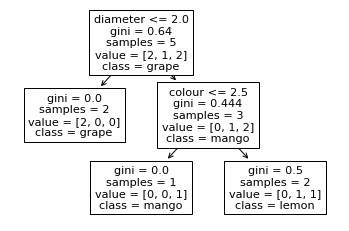

In [11]:
# import the function to plot tree and use it
from sklearn.tree import plot_tree
plot_tree(decision_tree, feature_names=X.columns, class_names=decision_tree.classes_)
plt.show()

We can now use our decision tree to classify other fruit. Le's try first to apply it to our data, that we used to create the tree. We can observe that one of the mango was misclassified, as it goes into the last node on the right. That illustrate that even with data it was trained on, the classifier is not perfect.

In [12]:
# display the label of the fruits
print('label     :', X['label'].to_numpy())
# display the prediction of the fruits by the classifier
print('prediction:', decision_tree.predict(X[X.columns[:-1]]))
# display the accuracy, between the classification of the tree and the original label
print('accuracy  :', decision_tree.score(X[X.columns[:-1]], X['label']))

label     : ['mango' 'mango' 'grape' 'grape' 'lemon']
prediction: ['mango' 'lemon' 'grape' 'grape' 'lemon']
accuracy  : 0.8


Next week we are going to see how to calculate accuracies in classification. Then, don't worry for now.

Let's try to classify other fruits now. We create some new by tweaking a bit our original fruits. this is a new dataset.

In [15]:
X2 = pd.DataFrame([['2.5','2','mango'],
                    ['2.9','3.3','mango'],
                    ['1.3','1','grape'],
                    ['1','1.6','grape'],
                    ['3.1','2.6','lemon']], columns=['colour','diameter','label'])
X2

,colour,diameter,label
0,2.5,2,mango
1,2.9,3.3,mango
2,1.3,1,grape
3,1,1.6,grape
4,3.1,2.6,lemon


And now we classify those new fruits

In [16]:
# display the label of the fruits
print('label     :', X2['label'].to_numpy())
# display the prediction of the fruits by the classifier
print('prediction:', decision_tree.predict(X2[X2.columns[:-1]]))
# display the accuracy, between the classification of the tree and the original label
print('accuracy  :', decision_tree.score(X2[X2.columns[:-1]], X2['label']))

label     : ['mango' 'mango' 'grape' 'grape' 'lemon']
prediction: ['grape' 'lemon' 'grape' 'grape' 'lemon']
accuracy  : 0.6


We have some misclassified fruit. To ascert the certainty of our model, we can ask the tree to give us the probability for each classification.

In [17]:
# we ask the tree to predict the new fruits, but instead of giving us the best fruit, it should give us probability
prediction = decision_tree.predict_proba(X2[X2.columns[:-1]])
# we create a data frame to display it in a pretty way
pd.DataFrame(prediction, columns=decision_tree.classes_)

,grape,lemon,mango
0,1.0,0.0,0.0
1,0.0,0.5,0.5
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.5,0.5


## Using a dataset

We are now familiar with the method, so we can apply it on a big dataset. We will import the iris dataset from scikit-learn

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
dataset = pd.DataFrame(iris.data, columns=iris.feature_names)

Let's visualise the first 9 rows

In [19]:
# We can visualise the dataset
dataset[:9].style

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.100000,3.500000,1.400000,0.200000
1,4.900000,3.000000,1.400000,0.200000
2,4.700000,3.200000,1.300000,0.200000
3,4.600000,3.100000,1.500000,0.200000
4,5.000000,3.600000,1.400000,0.200000
5,5.400000,3.900000,1.700000,0.400000
6,4.600000,3.400000,1.400000,0.300000
7,5.000000,3.400000,1.500000,0.200000
8,4.400000,2.900000,1.400000,0.200000


The iris dataset is divided into 3 classes. There are 150 flowers, 50 of each group (setosa, versicolor, and virginica).
We visualise the size, names of the classes, and the labels.

In [20]:
print('size:', len(iris.data))
print('classes name:', iris.target_names)
print('label:', iris.target)

size: 150
classes name: ['setosa' 'versicolor' 'virginica']
label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [21]:
# we create the decision tree classifier model
# random_state is used to fix the randomness and obtain the same result every time
decision_tree = DecisionTreeClassifier(random_state=4242)
# we create the tree based on our dataset
# we give it all the columns except the last one as data, and the last as label
decision_tree.fit(dataset, iris.target)

DecisionTreeClassifier(random_state=4242)

As before, we can get some insights on the tree without visualising it. Here for example, the feature importance tell us that the petal width is very important. We can also get a basic idea of the shape of our tree with it's depth and the number of leaves.

In [22]:
print(dict(zip(dataset.columns, decision_tree.feature_importances_)))
print('depth:', decision_tree.tree_.max_depth)
print('number of leaves:', decision_tree.tree_.n_leaves)

{'sepal length (cm)': 0.013333333333333329, 'sepal width (cm)': 0.0, 'petal length (cm)': 0.06405595813204505, 'petal width (cm)': 0.9226107085346216}
depth: 5
number of leaves: 9


Now that we visualise our tree, we understand why the petal width is so important. It can find all the setosa in one operation and then divide almost all of the versicolor and virginica in another. However, to divide further the remaining flower it has to do some very specific operation based on one or two flowers that seems to have unique characteristics.

For example on the fourth row, on the left, the tree divide the 49 versicolor and 1 virginica based on their petal width, but basing itself on only one virginica. 

To understand it better, it would be like, after dividing people by size, you obtain a group of 17 people taller than 2m, 16 boys and 1 girl. And then you say "The only redhead person whose taller than 2m is a girl, so every redhead people taller than 2m is a girl."

Because now, every time we will find some 'outlier' flower, there may be classified badly because then we created our tree, we tried to be as precise as possible.

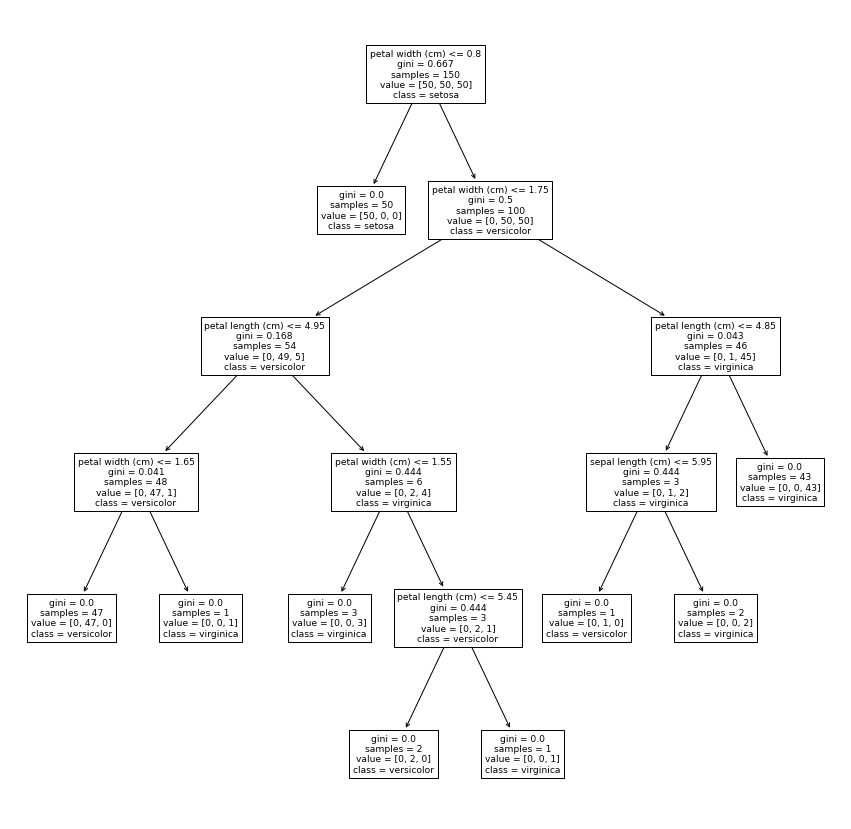

In [23]:
plt.figure(figsize=(15,15))
plot_tree(decision_tree, feature_names=dataset.columns, class_names=iris.target_names)
plt.show()

We can see how accurate is our tree when classifying the dataset. Here, the tree is very big, and as we said before it do a lot of small split, hence we have a very accurate result, when classifying the dataset which was used to create the tree.

In [24]:
print('accuracy  :', decision_tree.score(dataset, iris.target))

accuracy  : 1.0


To avoid having a very big tree that will have a tons of nodes classifying the flowers based on 1 or 2 unique specimens, we have multiple methods. We can define a maximum depth for our tree, so it doesn't go too far, we can set a specific number of specimens necessary to perform a split, or we can also define a maximum number of node to our tree. Each of those operation have their own pros and cons.

### Define a max depth

This is the easiest way to limit the nodes and splits of our tree. Since the best splits happen high in the tree, to cut the less interesting splits, we can just set a maximum tree height.

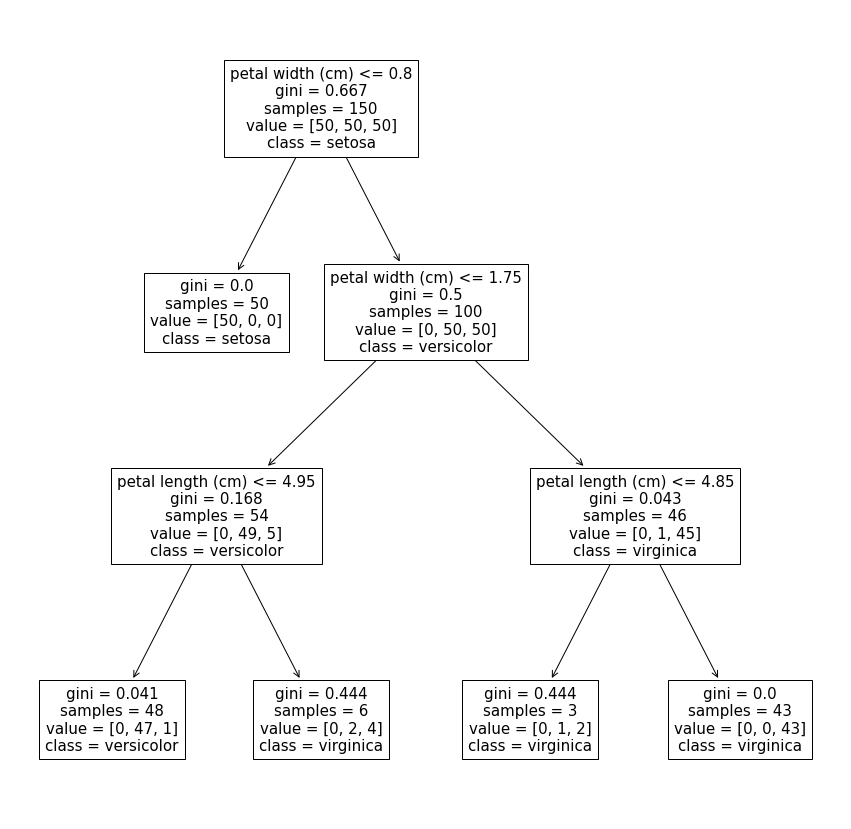

In [25]:
# we create the decision tree classifier model
# random_state is used to fix the randomness and obtain the same result every time
decision_tree = DecisionTreeClassifier(random_state=4242, max_depth=3)
# we create the tree based on our dataset
# we give it all the columns except the last one as data, and the last as label
decision_tree.fit(dataset, iris.target)
plt.figure(figsize=(15,15))
plot_tree(decision_tree, feature_names=dataset.columns, class_names=iris.target_names)
plt.show()

If we look at the accuracy, it's not perfect, but our tree is smaller.

In [26]:
print('accuracy  :', decision_tree.score(dataset, iris.target))

accuracy  : 0.9733333333333334


### Define a max number of leaves

This is a bit similar to the parameter K in Kmeans. By setting a specific number of leaves, you can decide how many groups you want to be formed at the end. For example, setting the number of leaves to the number of label will make you have the more basic possible split. This can be very nice to understand the most useful feature that separate each group. 

The more leaves you add, the more detailled your separation will be.

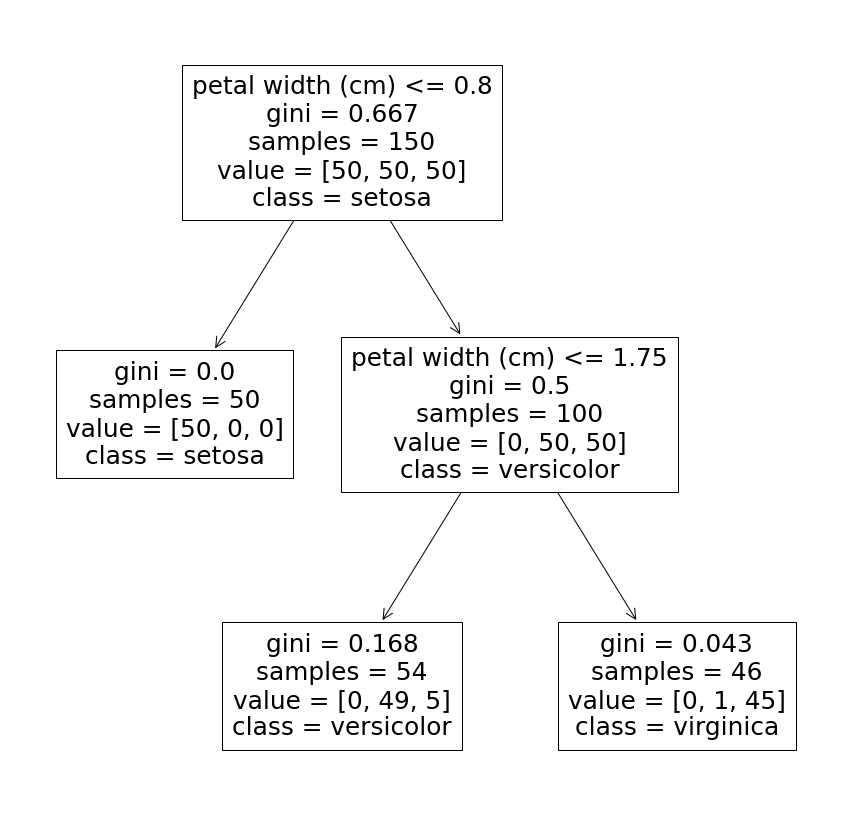

In [27]:
# we create the decision tree classifier model
# random_state is used to fix the randomness and obtain the same result every time
decision_tree = DecisionTreeClassifier(random_state=4242, max_leaf_nodes=3)
# we create the tree based on our dataset
# we give it all the columns except the last one as data, and the last as label
decision_tree.fit(dataset, iris.target)
plt.figure(figsize=(15,15))
plot_tree(decision_tree, feature_names=dataset.columns, class_names=iris.target_names)
plt.show()

We made the smallest tree possible to obtain one leaf for each class, and we still have a very big accuracy.

In [28]:
print('accuracy  :', decision_tree.score(dataset, iris.target))

accuracy  : 0.96


### Define a min number of element to split

As we can observe in our tree, the nodes are not expanded if they have less than 10 samples. This is working well when 2 classes have similar samples that are different from the other, for example the leaf child in the third row, with 6 samples. It wasn't expanded further, because there's not enough sample. Those 6 sample, of 2 different classes, 4 verginica and 2 versicolor, had a specific petal length and width, so dividing further wouldn't bring that much insight on how to recognize those 2 classes.

However, if we look at its left neighbor, the node with 48 samples, we can see that it divided the versicolor and the virginica in 2 based on the petal width on one flower. This is actually bad, because it means the tree made a decision based on only one sample, as we explained earlier. So it only reduce the split when there's few element in each class.

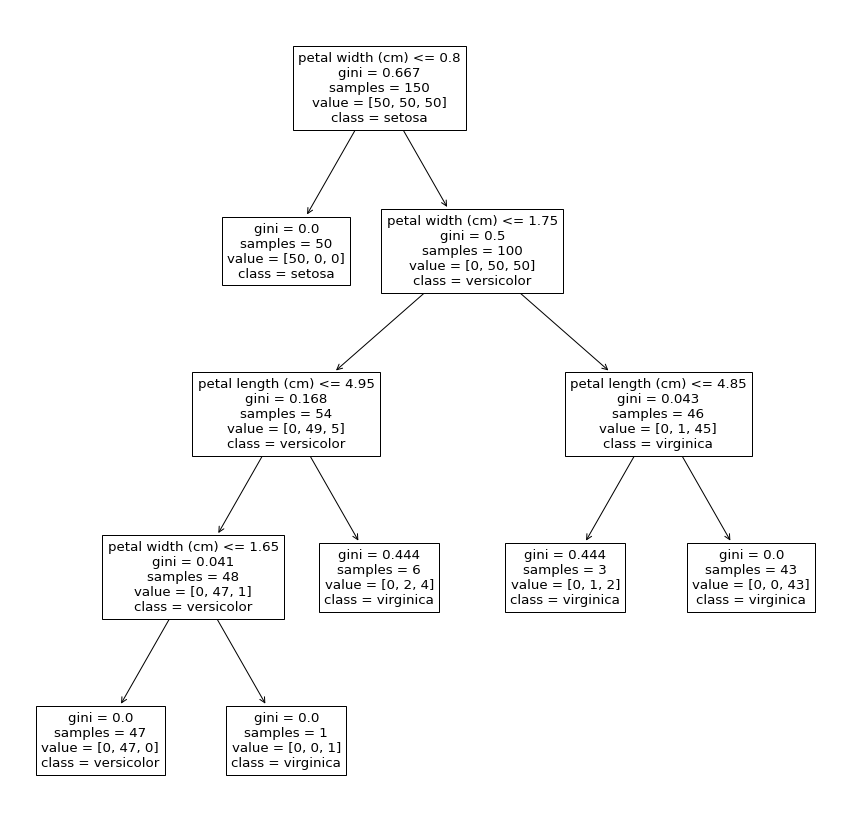

In [40]:
# we create the decision tree classifier model
# random_state is used to fix the randomness and obtain the same result every time
decision_tree = DecisionTreeClassifier(random_state=4242, min_samples_split=10)
# we create the tree bprint('accuracy  :', decision_tree.score(dataset, iris.target))ased on our dataset
# we give it all the columns except the last one as data, and the last as label
decision_tree.fit(dataset, iris.target)
plt.figure(figsize=(15,15))
plot_tree(decision_tree, feature_names=dataset.columns, class_names=iris.target_names)
plt.show()

Let's see the accuracy of this tree.

In [37]:
print('accuracy  :', decision_tree.score(dataset, iris.target))

accuracy  : 0.98
